<a href="https://colab.research.google.com/github/yuriishizawa/stock_analysis/blob/main/apresentacao_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Retorno de Ações e Avaliação de Desempenho de Carteira

#### **Autor**: Yuri Batista Ishizawa
#### **e-mail**: yuriishizawa@gmail.com
#### **Github**: https://github.com/yuriishizawa
#### **LinkedIn**: https://www.linkedin.com/in/yuriishizawa

## Importação dos pacotes
É necessário resetar o notebook para aplicar as atualizações dos pacotes.

In [37]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
from stock_analysis.app import (
    get_stock_data,
    format_tickers_with_suffix,
    plot_melted,
    generate_portifolio,
)

import plotly.figure_factory as ff
import numpy as np


yf.pdr_override()

sns.set()

In [44]:
START_DATE = "2021-01-01"

## Coleta dos dados

Foram consideradas as 20 maiores empresas da BOVESPA em termos de valor de mercado. 

Fonte: https://www.meusdividendos.com/empresas/ranking?q=valorMercado

In [45]:
tickers = format_tickers_with_suffix(
    tickers_str="BBAS3,CSMG3,TRPL4,NEOE3,BBSE3,CMIG4,GOAU4,KLBN4,SAPR4,BRAP4"
)

2024-04-02 18:18:50.250 | INFO     | stock_analysis.app:format_tickers_with_suffix:120 - Tickers ajustados: ['BBAS3.SA', 'CSMG3.SA', 'TRPL4.SA', 'NEOE3.SA', 'BBSE3.SA', 'CMIG4.SA', 'GOAU4.SA', 'KLBN4.SA', 'SAPR4.SA', 'BRAP4.SA']


[18:18:50 INFO] Tickers ajustados: ['BBAS3.SA', 'CSMG3.SA', 'TRPL4.SA', 'NEOE3.SA', 'BBSE3.SA', 'CMIG4.SA', 'GOAU4.SA', 'KLBN4.SA', 'SAPR4.SA', 'BRAP4.SA'] (app.py:120)


In [46]:
stock_data = get_stock_data(
    tickers, start=START_DATE, end=datetime.now().strftime("%Y-%m-%d")
)

[*********************100%%**********************]  10 of 10 completed


In [47]:
stock_data

,BBAS3.SA,BBSE3.SA,BRAP4.SA,CMIG4.SA,CSMG3.SA,GOAU4.SA,KLBN4.SA,NEOE3.SA,SAPR4.SA,TRPL4.SA
Date,,,,,,,,,,
2021-01-04,29.749985,22.762970,16.853085,6.607908,12.431832,7.522356,4.376527,14.990221,4.048450,21.024248
2021-01-05,29.441317,22.336988,17.182541,6.607908,12.241511,7.688104,4.385043,15.074625,3.942556,20.887825
2021-01-06,30.114044,21.972965,17.993517,6.743430,12.226286,7.981348,4.410586,15.007100,3.861097,20.758982
2021-01-07,31.309109,22.437674,19.356970,6.668659,12.157770,8.351091,4.810775,14.724806,3.779639,20.395187
2021-01-08,31.491135,23.134739,19.455812,7.126634,12.606930,8.210843,4.947009,15.408490,3.852952,21.206146
...,...,...,...,...,...,...,...,...,...,...
2024-03-28,56.619999,32.520000,20.590000,12.560000,21.780001,10.290000,5.030000,20.350000,5.250000,24.820000
2024-03-29,56.619999,32.520000,20.590000,12.560000,21.780001,10.290000,5.030000,20.350000,5.250000,24.820000
2024-03-30,56.619999,32.520000,20.590000,12.560000,21.780001,10.290000,5.030000,20.350000,5.250000,24.820000


## Análise Exploratória dos Dados

## Obtenção do retorno diário acumulado

In [48]:
returns = stock_data.apply(lambda x: x / x[0])

fig, df_return_melted = plot_melted(returns, "Retorno diário acumulado", dash=True)
fig.show()

### Agrupando tickers de acordo com retornos

/Users/yuri.ishizawa/projects/personal/stock_analysis/.venv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



<Figure size 640x480 with 0 Axes>

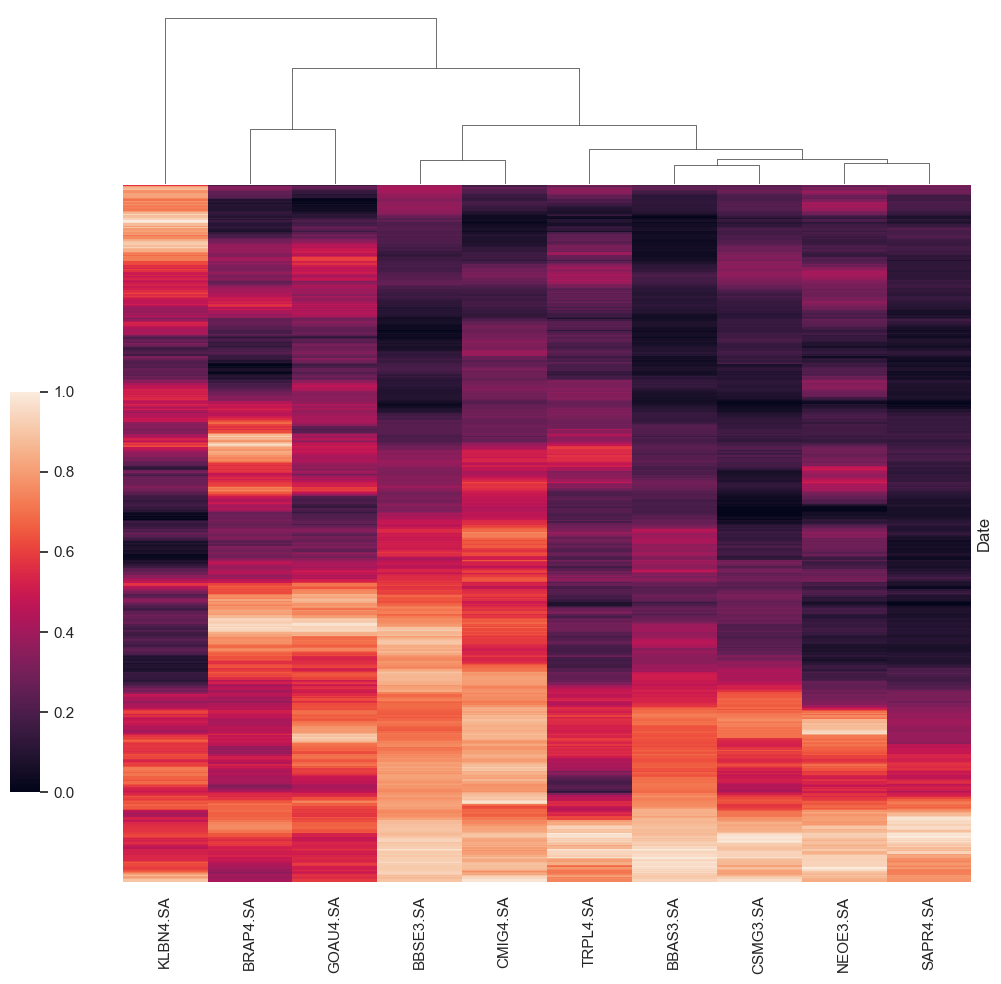

In [49]:
plt.figure()
sns.clustermap(
    returns,
    row_cluster=False,
    metric="correlation",
    yticklabels=False,
    standard_scale=1,
    dendrogram_ratio=(0.1, 0.2),
    cbar_pos=(0, 0.2, 0.03, 0.4),
)
plt.show()

In [9]:
np.random.seed(1)
fig = ff.create_dendrogram(returns.T, labels=returns.columns)
fig.show()

### Análise de volatilidade

In [10]:
pct_returns = stock_data.pct_change().dropna()
fig3, _ = plot_melted(pct_returns, "Retorno diário")

In [11]:
mean_std = pd.DataFrame(
    pct_returns.mean(), index=pct_returns.mean().index, columns=["Média"]
)
mean_std["Desvio-padrão"] = pct_returns.std().values
fig = px.scatter(mean_std.reset_index(), x="Desvio-padrão", y="Média", text="index")
fig.add_hline(0, line_dash="dash")
fig.show()

# Análise de performance de portifólio

### Gerando carteira com pesos aleatórios para cada ticker

### Gráfico de pizza agrupando por setores

In [23]:
portifolio = generate_portifolio(stock_data, max_share=10)
portifolio

,Ticker,Preço Ajustado,Setor,Quantidade,Total Investido,Porc. da Carteira
0,BBAS3.SA,24.573376,Financial Services,300.0,7372.01,14.790643
1,BBSE3.SA,16.623743,Financial Services,500.0,8311.87,16.676307
2,BRAP4.SA,19.358727,Financial Services,400.0,7743.49,15.535952
3,CMIG4.SA,7.320581,Utilities,800.0,5856.47,11.749978
4,CSMG3.SA,9.872087,Utilities,100.0,987.21,1.980663
5,GOAU4.SA,8.808236,Basic Materials,700.0,6165.77,12.370534
6,KLBN4.SA,4.347674,Basic Materials,400.0,1739.07,3.489138
7,NEOE3.SA,13.797019,Utilities,600.0,8278.21,16.608774
8,SAPR4.SA,3.170994,Utilities,400.0,1268.40,2.544822
9,TRPL4.SA,21.198881,Utilities,100.0,2119.89,4.253187


In [24]:
fig = px.sunburst(
    portifolio,
    path=["Setor", "Ticker"],
    values="Porc. da Carteira",
    hover_data=["Total Investido"],
    width=700,
    height=700,
    title="Distribuição dos papéis na carteira",
)
fig.show()

## Retorno da Carteira

In [27]:
portifolio_return = np.dot(
    returns.values, portifolio.set_index("Ticker")["Porc. da Carteira"].div(100).values
)

ibov = pdr.DataReader(
    "^BVSP", start=START_DATE, end=datetime.now().strftime("%Y-%m-%d")
)
ibov = ibov.apply(lambda x: x / x[0])["Adj Close"]

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=returns.index, y=portifolio_return, mode="lines", name="Carteira")
)

fig.add_hline(1, line_dash="dash")
fig.add_trace(go.Scatter(x=ibov.index, y=ibov.values, mode="lines", name="IBOV"))
fig.update_layout(
    title="Performance da Carteira vs Performance IBOV",
    xaxis_title="Data",
    yaxis_title="Retorno diário acumulado",
)
return_pct = (portifolio_return[-1] - 1) * 100
fig.show()
print(
    f"Para o valor investido de {portifolio['Total Investido'].sum():.02f} reais, em "
    f"{START_DATE}, seria possível, com nossa carteira, gerar um rendimento de: "
    f"{portifolio['Total Investido'].sum()*return_pct:.02f} reais "
    f"({return_pct:.02f}%)"
)

[*********************100%%**********************]  1 of 1 completed


Para o valor investido de 49842.39 reais, em 2022-01-01, seria possível, com nossa carteira, gerar um rendimento de: 2999762.26 reais (60.18%)


# Simula vários portifólios

In [53]:
return_results = pd.DataFrame()

for i in range(1, 11):
    portifolio = generate_portifolio(stock_data, max_share=5)
    portifolio_return = np.dot(
        returns.values,
        portifolio.set_index("Ticker")["Porc. da Carteira"].div(100).values,
    )

    ibov = pdr.DataReader(
        "^BVSP", start=START_DATE, end=datetime.now().strftime("%Y-%m-%d")
    )
    ibov = ibov.apply(lambda x: x / x[0])["Adj Close"]

    fig = go.Figure()
    fig.add_trace(
        go.Scatter(x=returns.index, y=portifolio_return, mode="lines", name="Carteira")
    )

    fig.add_hline(1, line_dash="dash")
    fig.add_trace(go.Scatter(x=ibov.index, y=ibov.values, mode="lines", name="IBOV"))
    fig.update_layout(
        title="Performance da Carteira vs Performance IBOV",
        xaxis_title="Data",
        yaxis_title="Retorno diário acumulado",
    )

    return_pct = (portifolio_return[-1] - 1) * 100

    # fig.show()
    print(
        f"Para o valor investido de {portifolio['Total Investido'].sum():.02f} reais, em "
        f"{START_DATE}, seria possível, com nossa carteira, gerar um rendimento de: "
        f"{portifolio['Total Investido'].sum()*return_pct:.02f} reais "
        f"({return_pct:.02f}%)"
    )
    print("Distribuição da carteirao:")

    display(
        portifolio[["Ticker", "Porc. da Carteira"]]
        .round(2)
        .sort_values("Porc. da Carteira", ascending=False)
    )

    return_aux = portifolio[["Ticker", "Porc. da Carteira"]].round(2)
    return_aux["Rendimento"] = return_pct
    return_results = return_results.append(return_aux)

[*********************100%%**********************]  1 of 1 completed
Para o valor investido de 16101.94 reais, em 2021-01-01, seria possível, com nossa carteira, gerar um rendimento de: 738704.46 reais (45.88%)
Distribuição da carteirao:


,Ticker,Porc. da Carteira
0,BBAS3.SA,18.48
1,BBSE3.SA,14.14
9,TRPL4.SA,13.06
6,KLBN4.SA,10.87
2,BRAP4.SA,10.47
5,GOAU4.SA,9.34
7,NEOE3.SA,9.31
4,CSMG3.SA,7.72
3,CMIG4.SA,4.10
8,SAPR4.SA,2.51


/var/folders/qy/yp2r0rpn4h995fn802xksst40000gq/T/ipykernel_27312/2745590644.py:47: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
Para o valor investido de 23735.86 reais, em 2021-01-01, seria possível, com nossa carteira, gerar um rendimento de: 1217113.22 reais (51.28%)
Distribuição da carteirao:


,Ticker,Porc. da Carteira
3,CMIG4.SA,13.92
5,GOAU4.SA,12.68
7,NEOE3.SA,12.63
0,BBAS3.SA,12.53
4,CSMG3.SA,10.48
1,BBSE3.SA,9.59
9,TRPL4.SA,8.86
8,SAPR4.SA,8.53
2,BRAP4.SA,7.10
6,KLBN4.SA,3.69


/var/folders/qy/yp2r0rpn4h995fn802xksst40000gq/T/ipykernel_27312/2745590644.py:47: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
Para o valor investido de 20592.06 reais, em 2021-01-01, seria possível, com nossa carteira, gerar um rendimento de: 915594.76 reais (44.46%)
Distribuição da carteirao:


,Ticker,Porc. da Carteira
0,BBAS3.SA,14.45
6,KLBN4.SA,12.75
4,CSMG3.SA,12.07
1,BBSE3.SA,11.05
5,GOAU4.SA,10.96
9,TRPL4.SA,10.21
8,SAPR4.SA,9.83
2,BRAP4.SA,8.18
7,NEOE3.SA,7.28
3,CMIG4.SA,3.21


/var/folders/qy/yp2r0rpn4h995fn802xksst40000gq/T/ipykernel_27312/2745590644.py:47: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
Para o valor investido de 23638.77 reais, em 2021-01-01, seria possível, com nossa carteira, gerar um rendimento de: 1106522.17 reais (46.81%)
Distribuição da carteirao:


,Ticker,Porc. da Carteira
3,CMIG4.SA,13.98
8,SAPR4.SA,13.70
6,KLBN4.SA,12.96
7,NEOE3.SA,12.68
0,BBAS3.SA,12.59
1,BBSE3.SA,9.63
9,TRPL4.SA,8.89
2,BRAP4.SA,7.13
4,CSMG3.SA,5.26
5,GOAU4.SA,3.18


/var/folders/qy/yp2r0rpn4h995fn802xksst40000gq/T/ipykernel_27312/2745590644.py:47: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
Para o valor investido de 27511.01 reais, em 2021-01-01, seria possível, com nossa carteira, gerar um rendimento de: 1302698.43 reais (47.35%)
Distribuição da carteirao:


,Ticker,Porc. da Carteira
2,BRAP4.SA,12.25
3,CMIG4.SA,12.01
8,SAPR4.SA,11.77
5,GOAU4.SA,10.94
7,NEOE3.SA,10.90
0,BBAS3.SA,10.81
4,CSMG3.SA,9.04
1,BBSE3.SA,8.27
9,TRPL4.SA,7.64
6,KLBN4.SA,6.36


/var/folders/qy/yp2r0rpn4h995fn802xksst40000gq/T/ipykernel_27312/2745590644.py:47: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
Para o valor investido de 21648.53 reais, em 2021-01-01, seria possível, com nossa carteira, gerar um rendimento de: 1022345.54 reais (47.22%)
Distribuição da carteirao:


,Ticker,Porc. da Carteira
6,KLBN4.SA,14.15
7,NEOE3.SA,13.85
0,BBAS3.SA,13.74
3,CMIG4.SA,12.21
1,BBSE3.SA,10.51
5,GOAU4.SA,10.42
9,TRPL4.SA,9.71
2,BRAP4.SA,7.78
4,CSMG3.SA,5.74
8,SAPR4.SA,1.87


/var/folders/qy/yp2r0rpn4h995fn802xksst40000gq/T/ipykernel_27312/2745590644.py:47: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
Para o valor investido de 22333.37 reais, em 2021-01-01, seria possível, com nossa carteira, gerar um rendimento de: 1003762.95 reais (44.94%)
Distribuição da carteirao:


,Ticker,Porc. da Carteira
4,CSMG3.SA,16.70
2,BRAP4.SA,15.09
6,KLBN4.SA,13.72
7,NEOE3.SA,13.42
0,BBAS3.SA,13.32
1,BBSE3.SA,10.19
9,TRPL4.SA,9.41
5,GOAU4.SA,3.37
3,CMIG4.SA,2.96
8,SAPR4.SA,1.81


/var/folders/qy/yp2r0rpn4h995fn802xksst40000gq/T/ipykernel_27312/2745590644.py:47: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
Para o valor investido de 24380.29 reais, em 2021-01-01, seria possível, com nossa carteira, gerar um rendimento de: 1269370.71 reais (52.07%)
Distribuição da carteirao:


,Ticker,Porc. da Carteira
4,CSMG3.SA,15.30
2,BRAP4.SA,13.83
3,CMIG4.SA,13.55
0,BBAS3.SA,12.20
8,SAPR4.SA,9.96
1,BBSE3.SA,9.34
5,GOAU4.SA,9.26
9,TRPL4.SA,8.62
7,NEOE3.SA,6.15
6,KLBN4.SA,1.80


/var/folders/qy/yp2r0rpn4h995fn802xksst40000gq/T/ipykernel_27312/2745590644.py:47: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
Para o valor investido de 21269.62 reais, em 2021-01-01, seria possível, com nossa carteira, gerar um rendimento de: 1074536.71 reais (50.52%)
Distribuição da carteirao:


,Ticker,Porc. da Carteira
5,GOAU4.SA,14.15
0,BBAS3.SA,13.99
3,CMIG4.SA,12.43
4,CSMG3.SA,11.69
1,BBSE3.SA,10.70
6,KLBN4.SA,10.29
9,TRPL4.SA,9.88
2,BRAP4.SA,7.92
7,NEOE3.SA,7.05
8,SAPR4.SA,1.90


/var/folders/qy/yp2r0rpn4h995fn802xksst40000gq/T/ipykernel_27312/2745590644.py:47: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
Para o valor investido de 18175.76 reais, em 2021-01-01, seria possível, com nossa carteira, gerar um rendimento de: 888622.77 reais (48.89%)
Distribuição da carteirao:


,Ticker,Porc. da Carteira
0,BBAS3.SA,16.37
1,BBSE3.SA,12.52
5,GOAU4.SA,12.42
9,TRPL4.SA,11.57
3,CMIG4.SA,10.91
6,KLBN4.SA,9.63
2,BRAP4.SA,9.27
7,NEOE3.SA,8.25
4,CSMG3.SA,6.84
8,SAPR4.SA,2.23


/var/folders/qy/yp2r0rpn4h995fn802xksst40000gq/T/ipykernel_27312/2745590644.py:47: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

